In [1]:
#Import Packages and datasets
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv(".\..\Alzheimer Dataset\\alzheimers_disease_data.csv")

In [3]:
#EDA
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
df = df.drop(columns=['PatientID','DoctorInCharge'])

In [6]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [7]:
df['Age_Cat'] = pd.cut(df['Age'],bins=[60,69,79,90], labels=["60-70","70-80","80-90"])

C:\Users\HrishikeshPawar\AppData\Local\Temp\ipykernel_42716\2939445447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(df.groupby('Age_Cat').size(),labels=df.groupby('Age_Cat').size().index,colors = colors, autopct='%.0f%%')
C:\Users\HrishikeshPawar\AppData\Local\Temp\ipykernel_42716\2939445447.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.pie(df.groupby('Age_Cat').size(),labels=df.groupby('Age_Cat').size().index,colors = colors, autopct='%.0f%%')


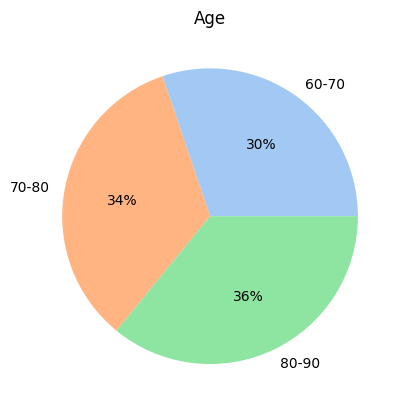

In [8]:
colors = sns.color_palette('pastel')
plt.pie(df.groupby('Age_Cat').size(),labels=df.groupby('Age_Cat').size().index,colors = colors, autopct='%.0f%%')
plt.title("Age")
plt.show()

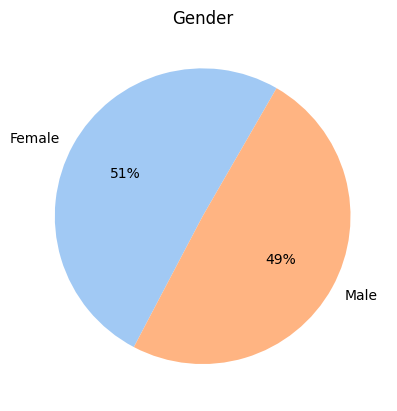

In [9]:
plt.pie(df['Gender'].value_counts(),startangle=60,labels=['Female','Male'], colors = colors, autopct='%.0f%%')
plt.title("Gender")
plt.show()

([<matplotlib.patches.Wedge at 0x1fdb03443d0>,
 [Text(-0.32243749478814, 1.051681540179701, 'Caucasian'),
  Text(-0.33777685263102253, -1.0468556719179014, 'African American'),
  Text(0.6744645668877673, -0.868963490609874, 'Other'),
  Text(1.0504961078924284, -0.3262789102943367, 'Asian')],
 [Text(-0.17587499715716723, 0.5736444764616551, '59%'),
  Text(-0.18424191961692138, -0.5710121846824916, '21%'),
  Text(0.367889763756964, -0.47398008578720396, '10%'),
  Text(0.5729978770322336, -0.1779703147060018, '10%')])

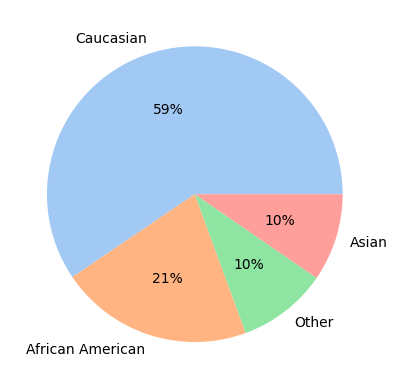

In [10]:
plt.pie(df['Ethnicity'].value_counts(),labels=['Caucasian','African American','Other','Asian'],colors=colors, autopct='%.0f%%' )

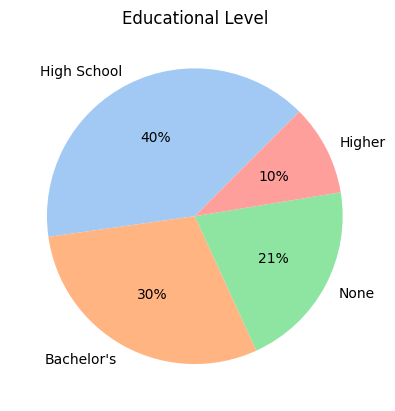

In [11]:
plt.pie(df['EducationLevel'].value_counts(),startangle=45, labels=['High School',"Bachelor's",'None','Higher'], colors = colors, autopct='%.0f%%')
plt.title("Educational Level")
plt.show()

In [12]:
df = df.drop(columns=['Age_Cat'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [14]:
num_cols = df.select_dtypes(include='float64').columns.to_list()+['Age','SystolicBP','DiastolicBP']
cat_cols = [col for col in df.columns if col not in num_cols]

In [15]:
len(num_cols)

15

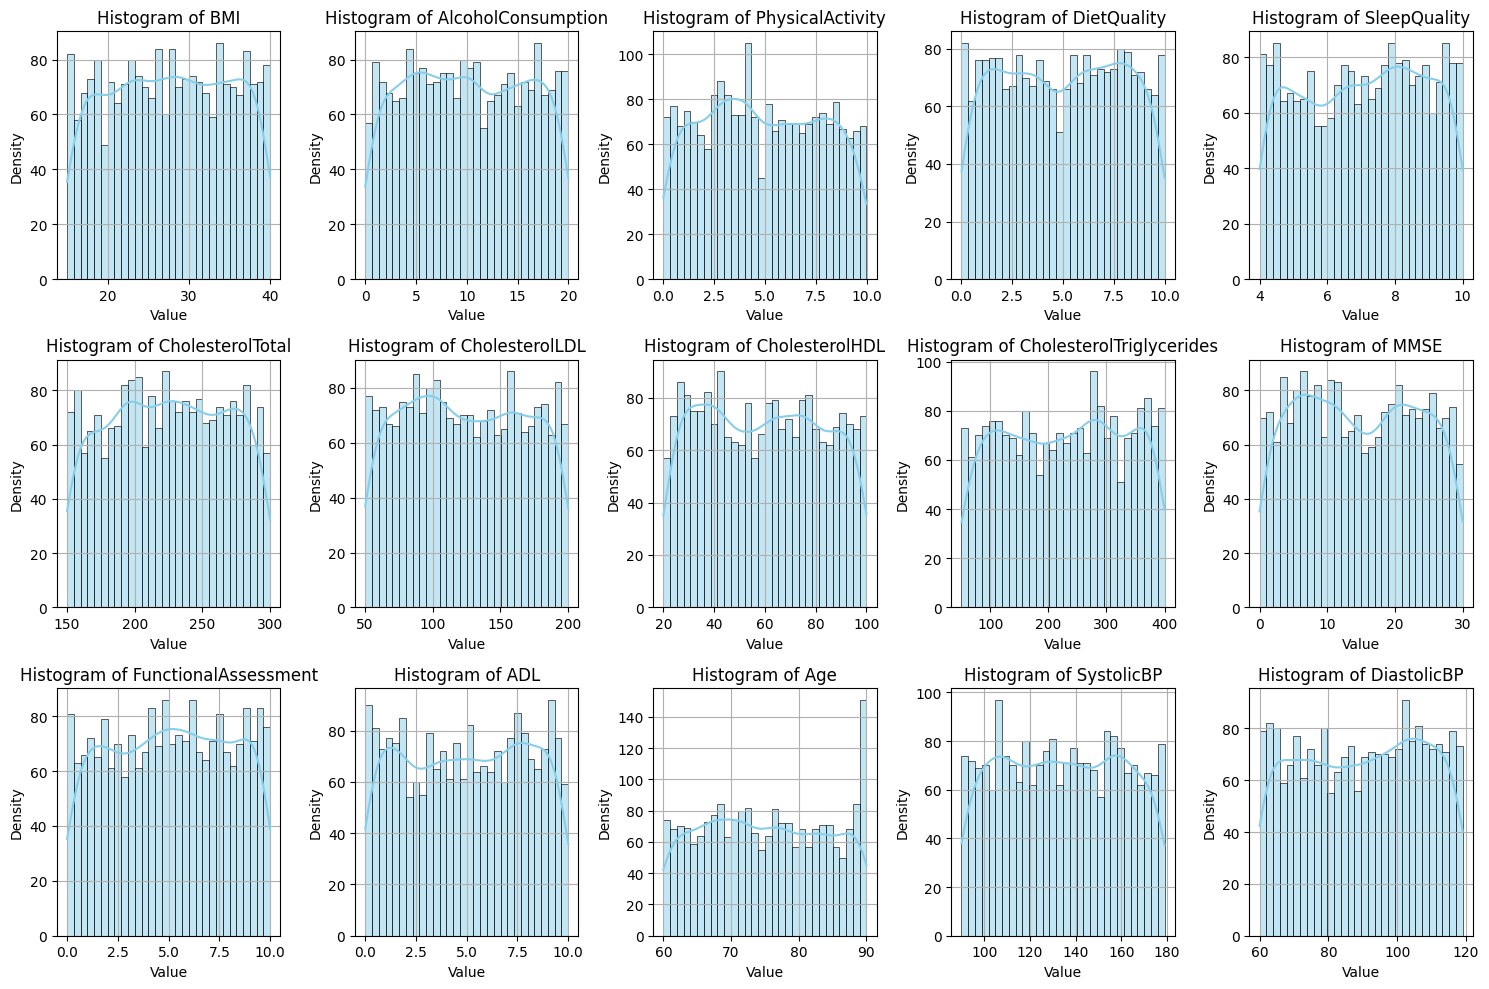

In [16]:
# Plot histograms and KDEs in a 3x5 grid
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 3 rows, 5 columns

# Flatten axes array to iterate over it easily
for i, col in enumerate(num_cols):
    ax = axes.flat[i]
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [17]:
#Check for data imbalance
df['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [18]:
#Test train split
x = df[df.columns.difference(['Diagnosis'])]
y = df['Diagnosis'].to_frame()
x_train, x_test,y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2, stratify=y)

In [19]:
#Feature engineering
# Define preprocessing steps for numerical and categorical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())  # MinMax scaling for numerical columns
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical columns
])

# Combine preprocessing steps into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),  # Apply to numerical columns
        ('cat', categorical_transformer,['Ethnicity','EducationLevel'])  # Apply to categorical columns
    ])

# # Resample the training data using SMOTE
# smote = SMOTE(random_state=42)
# x_train, y_train = smote.fit_resample(x_train, y_train)

In [20]:
# Define multiple classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Naive Bayes':GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

In [21]:
# Create pipelines for each classifier with SMOTE
pipelines = {}
for clf_name, clf in classifiers.items():
    pipelines[clf_name] = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

In [22]:
# Fit and evaluate each pipeline on preprocessed data
for clf_name, pipeline in pipelines.items():
    print(f"Training {clf_name}...")
    pipeline.fit(x_train, y_train['Diagnosis'])
    y_pred = pipeline.predict(x_test)
    print(f"Evaluating {clf_name}:")
    print(classification_report(y_test, y_pred))
    print("="*40)

Training Logistic Regression...
Evaluating Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       278
           1       0.78      0.64      0.70       152

    accuracy                           0.81       430
   macro avg       0.80      0.77      0.78       430
weighted avg       0.80      0.81      0.80       430

Training Support Vector Classifier...
Evaluating Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84       278
           1       0.77      0.55      0.64       152

    accuracy                           0.78       430
   macro avg       0.78      0.73      0.74       430
weighted avg       0.78      0.78      0.77       430

Training Naive Bayes...
Evaluating Naive Bayes:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       278
           1       0.74      0.61      0.67      

In [28]:
# Using XGBoost with Randomized search CV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}
print(f"Training XGB Classifier...")
XGB = XGBClassifier(random_state = 42)
XGB_RandomSearchCV = RandomizedSearchCV(estimator=XGB,param_distributions=param_grid, cv=5, scoring='accuracy', verbose=1, random_state=42)
XGB_RandomSearchCV.fit(x_train, y_train)
print(f"Best Parameters for XGB Classifier:")
print(XGB_RandomSearchCV.best_params_)
print(f"Evaluating XGB Classifier:")    
XGB_y_pred = XGB_RandomSearchCV.best_estimator_.predict(x_test)
print(classification_report(y_test, XGB_y_pred))

Training XGB Classifier...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for XGB Classifier:
{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Evaluating XGB Classifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.95      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



In [ ]:
pri